## Generation Expansion Planning (GEP) Formulation

The following sections describe a simple GEP formulation that incorporates uncertainty in renewable energy by using stochastic scenarios for a single stage problem (e.g., one single or target year).

### Indices

| **Name** | **Description**                   |
|----------|-----------------------------------|
| $p$      | time periods                      |
| $g$      | generation technologies           |
| $r(g)$   | subset of renewable techonologies |
| $sc$     | scenarios                         |

### Parameters

| **Name**   | **Domains** | **Description**                                             |
|------------|-------------|-------------------------------------------------------------|
| $pVOLL   $ |             | Value of Lost Load [\$/MWh]                                 |
| $pWeight $ |             | Representative period weight [hours]                        |
| $pInvCost$ | $g$         | Investment cost [\$/MW]                                     |
| $pVarCost$ | $g$         | Variable production cost [\$/MWh]                           |
| $pUnitCap$ | $g$         | Capacity per each invested unit [MW/unit]                   |
| $pRenProf$ | $r,p,sc$    | Renewable profile (e.g., load factor) [p.u.]                |
| $pDemand $ | $p$         | Demand [MW]                                                 |
| $pScProb $ | $sc$        | Scenario probability [p.u.]                                 |

### Variables

| **Name**    | **Domains** | **Description**              |
|-------------|-------------|------------------------------|
| $vTotCost $ |             | Total system cost [\$]       |
| $vInvCost $ |             | Total investment cost [\$]   |
| $vOpeCost $ |             | Total operating cost [\$]    |
| $vGenInv  $ | $g$         | Generation investment [1..N] |
| $vGenProd $ | $g,p,sc$    | Generation production [MW]   |
| $vLossLoad$ | $p,sc$      | Loss of load [MW]            |

### Equations

| **Name**    | **Domains** | **Description**                    |
|-------------|-------------|------------------------------------|
| $eObjFun $  |             | Total system cost [\$]             |
| $eInvCost$  |             | Total investment cost [\$]         |
| $eOpeCost$  |             | Total operating cost [\$]          |
| $eBalance$  | $p,sc$      | Power system balance [MWh]         |
| $eMaxProd$  | $g,p,sc$    | Maximum generation production [MW] |
| $eRenProd$  | $r,p,sc$    | Maximum renewable production [MW]  |

#### *eObjFun*

$$
\displaystyle{\min{vTotCost = vInvCost + vOpeCost}}
$$

#### *eInvCost*

$$
vInvCost = \displaystyle \sum_{g}(pInvCost_{g} \cdot pUnitCap_{g} \cdot vGenInv_{g})
$$

#### *eOpeCost*

$$
vOpeCost = pWeight \cdot {\left(\displaystyle \sum_{sc}pScProb_{sc}\cdot{\left(\sum_{g,p}pVarCost_{g} \cdot vGenProd_{g,p,sc} + \sum_{p,sc}pVOLL \cdot vLossLoad_{p,sc}\right)}\right)}
$$

#### *eBalance*

$$
\displaystyle \sum_{g}vGenProd_{g,p,sc} + vLossLoad_{p,sc} = pDemand_{p} \quad \forall{p,sc}
$$

#### *eMaxProd*

$$
vGenProd_{g,p,sc} \leq pUnitCap_{g} \cdot vGenInv_{g} \quad \forall{g,p,sc}
$$

#### *eRenProd*

$$
vGenProd_{r,p,sc} \leq pRenProf_{r,p,sc} \cdot pUnitCap_{r} \cdot vGenInv_{r} \quad \forall{r,p,sc}
$$

#### *Bounds*

$vGenProd_{g,p,sc}\geq 0 ~ \forall g, p, sc $

$vLossLoad_{p,sc}\geq 0 ~ \forall p, sc $

$vGenInv_{g} \in \mathbb{Z}^{+} ~ \forall g $


In [1]:
# Folders names
input_folder  = joinpath(@__DIR__, "inputs/single-stage-3sc")
output_folder = joinpath(@__DIR__, "outputs/single-stage-3sc")

"c:\\github-repos\\generation-expansion-planning-models-jump\\outputs/single-stage-3sc"

In [2]:
# include the file with the functions for the stochastic GEP model
include("Stochastic-GEP.jl")

save_results_to_csv (generic function with 1 method)

In [3]:
# read the data
sets, params = read_data(input_folder)

(Dict{Symbol, Vector}(:P => String3["h01", "h02", "h03", "h04", "h05", "h06", "h07", "h08", "h09", "h10"  …  "h15", "h16", "h17", "h18", "h19", "h20", "h21", "h22", "h23", "h24"], :SC => String3["sc1", "sc2", "sc3"], :G => String7["ocgt", "ccgt", "wind", "solar"]), Dict{Symbol, Any}(:p_unit_capacity => Dict{String7, Int64}("ccgt" => 400, "ocgt" => 100, "solar" => 10, "wind" => 50), :p_ens_cost => 0.18, :p_rp_weight => 365, :p_investment_cost => Dict{String7, Int64}("ccgt" => 40, "ocgt" => 25, "solar" => 50, "wind" => 70), :p_demand => Dict{String3, Int64}("h11" => 1010, "h17" => 963, "h09" => 902, "h12" => 1023, "h23" => 1053, "h18" => 997, "h24" => 1035, "h03" => 814, "h08" => 834, "h07" => 779…), :p_variable_cost => Dict{String7, Float64}("ccgt" => 0.05, "ocgt" => 0.07, "solar" => 0.0, "wind" => 0.001), :p_sc_prob => Dict{String3, Float64}("sc3" => 0.3, "sc1" => 0.2, "sc2" => 0.5), :p_availability => Dict{Tuple{String3, String7, String3}, Float64}(("sc2", "solar", "h18") => 0.03, ("s

In [4]:
model = create_and_solve_model(sets, params)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
324 rows, 328 cols, 828 nonzeros
324 rows, 328 cols, 828 nonzeros

Solving MIP model with:
   324 rows
   328 cols (0 binary, 4 integer, 0 implied int., 324 continuous)
   828 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   0               inf                  inf        0      0      0         0     0.0s
 S       0       0         0   0.00%   0               280560.689296    100.00%        0      0      0         0     0.0s
 R       0       0         0   0.00%   267871.615222   275290.384         2.69%        0      0      0       188     0.0s
 S       0       0         0   0.00%   268415.531506   274284.853914      2.14%       41      8      1       199    

A JuMP Model
Minimization problem with:
Variables: 364
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 72 constraints
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 288 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 364 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 72 constraints
`VariableRef`-in-`MathOptInterface.Integer`: 4 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: HiGHS
Names registered in the model: c_balance, c_max_prod, v_ens, v_investment, v_production

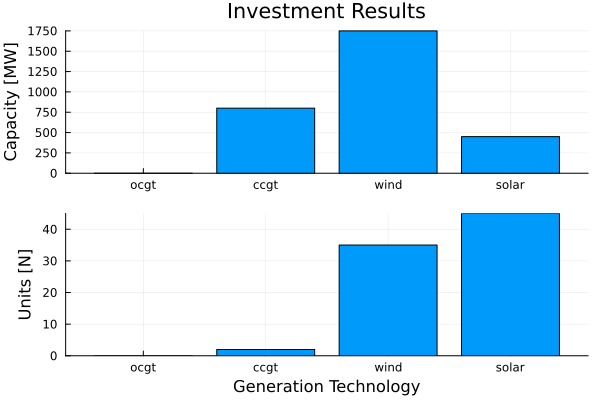

In [5]:
#plotly()
plot_investment(model, sets, params)

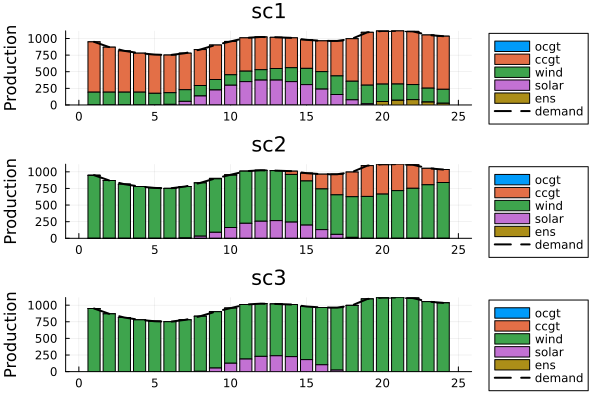

In [6]:
plot_production(model, params)

In [7]:
save_results_to_csv(output_folder, model)